# Problem 1: Clustering

## Bank Marketing Dataset

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('bank_marketing_part1_Data.csv') #importing the dataset

In [3]:
df.head() #displaying top 5 rows of the dataset

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.info() #displaying features info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df.isnull().sum() # check for null values

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [6]:
df.describe() #statistical description of the dataset

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


Distplot for variable:  spending
*****************************************************


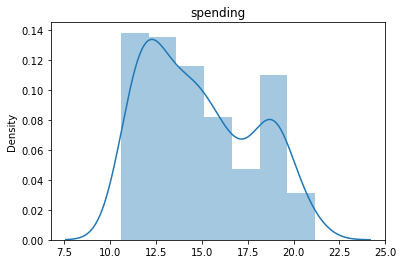

*****************************************************


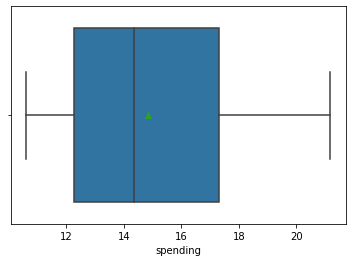

----------------------------------------------------- 
 

Distplot for variable:  advance_payments
*****************************************************


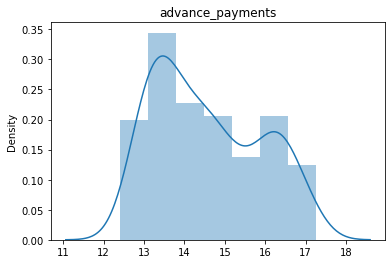

*****************************************************


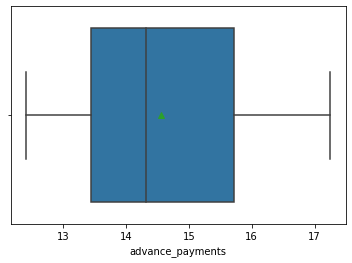

----------------------------------------------------- 
 

Distplot for variable:  probability_of_full_payment
*****************************************************


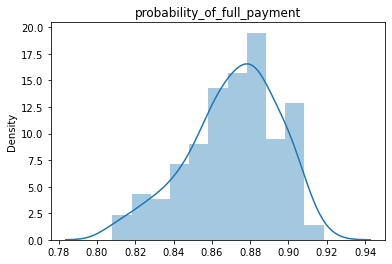

*****************************************************


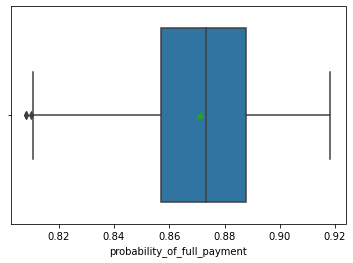

----------------------------------------------------- 
 

Distplot for variable:  current_balance
*****************************************************


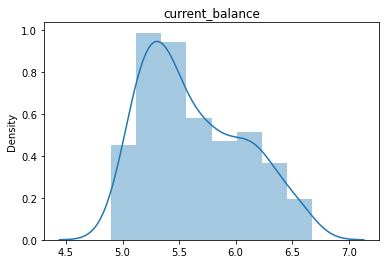

*****************************************************


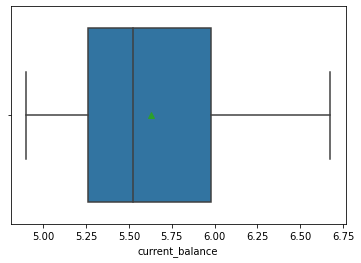

----------------------------------------------------- 
 

Distplot for variable:  credit_limit
*****************************************************


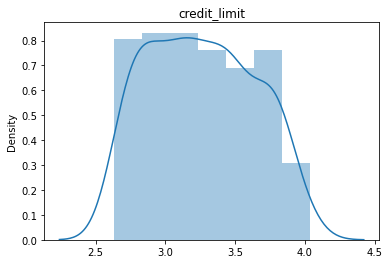

*****************************************************


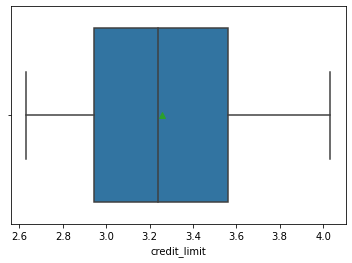

----------------------------------------------------- 
 

Distplot for variable:  min_payment_amt
*****************************************************


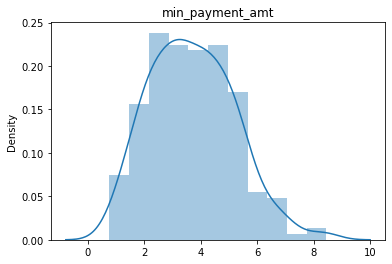

*****************************************************


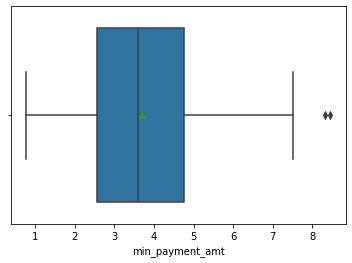

----------------------------------------------------- 
 

Distplot for variable:  max_spent_in_single_shopping
*****************************************************


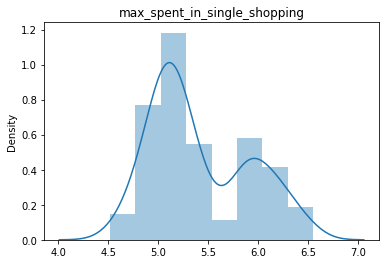

*****************************************************


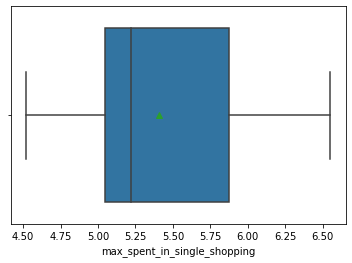

----------------------------------------------------- 
 



In [7]:
# Univariate analysis:
for i in df.columns:
    print('Distplot for variable: ',i)
    print('*****************************************************')
    plt.title(i)
    sns.distplot(x=df[i])
    plt.show()
    print('*****************************************************')
    sns.boxplot(x=i,data=df,showmeans = True)
    plt.show()
    print('----------------------------------------------------- \n \n')

<AxesSubplot:>

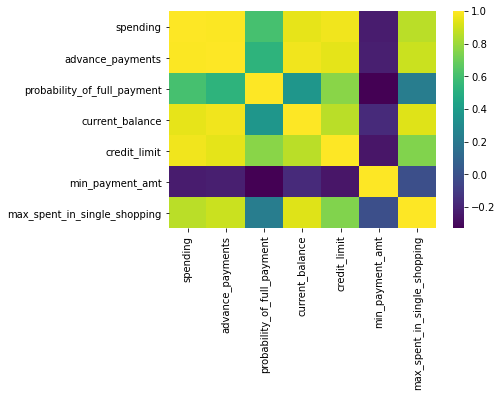

In [8]:
corr = df.corr()
sns.heatmap(corr,cmap='viridis') # correlation plot

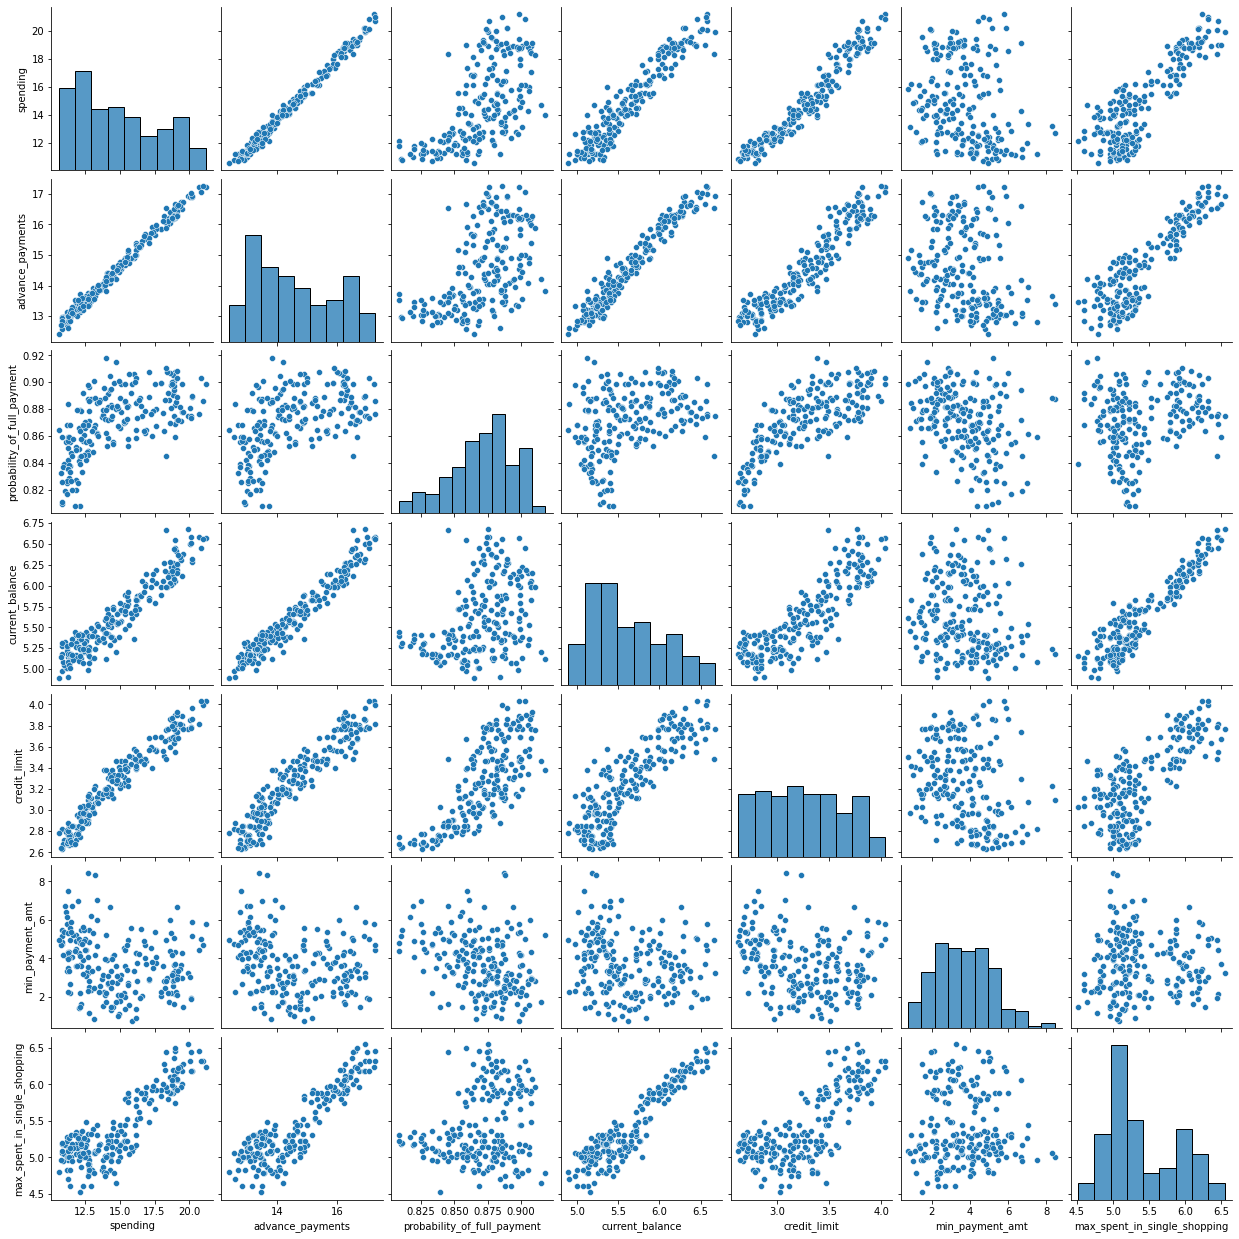

In [9]:
sns.pairplot(data=df) # bivariate visualization b/w different pairs of features of dataset

In [10]:
sc = StandardScaler() #creating standard scaler object for normalizing the data

In [11]:
df_scaled= sc.fit_transform(df) # Scaling the dataset and storing the scaled dataset in new variable 

In [12]:
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [13]:
from scipy.cluster.hierarchy import dendrogram,linkage 

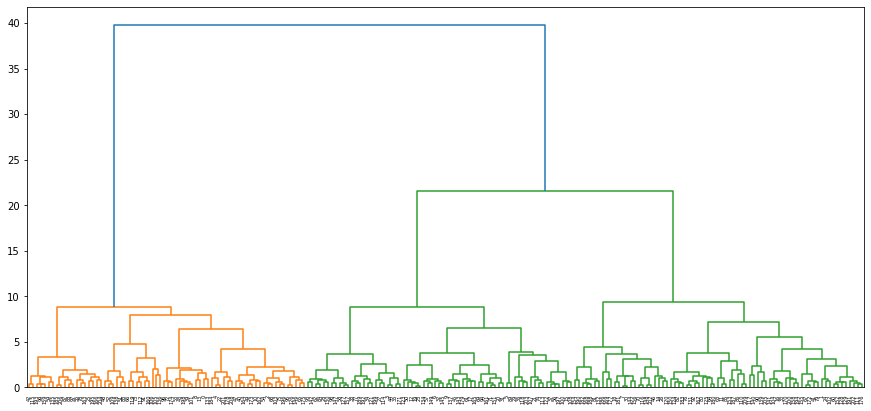

In [14]:
wardlink = linkage(df_scaled, method = 'ward') # creating a linkage object for hierarchical clustering
plt.figure(figsize=[15,7])
dendro = dendrogram(wardlink) # dendrogram of full depth 

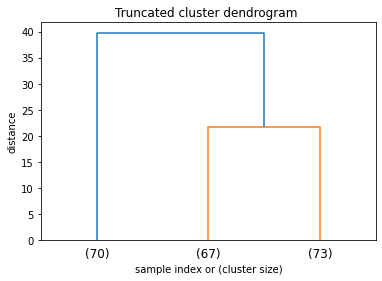

In [15]:
plt.title('Truncated cluster dendrogram ') 
plt.xlabel('sample index or (cluster size)') 
plt.ylabel('distance')
dendro = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 3,
                 ) # truncated dendrogram for 3 clusters

In [16]:
from scipy.cluster.hierarchy import fcluster

In [17]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters #getting cluster labels for each data point 

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [18]:
df['cluster'] = clusters # putting the obatined labels in new column 

In [19]:
df.head() # top 5 data points of updated dataset

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


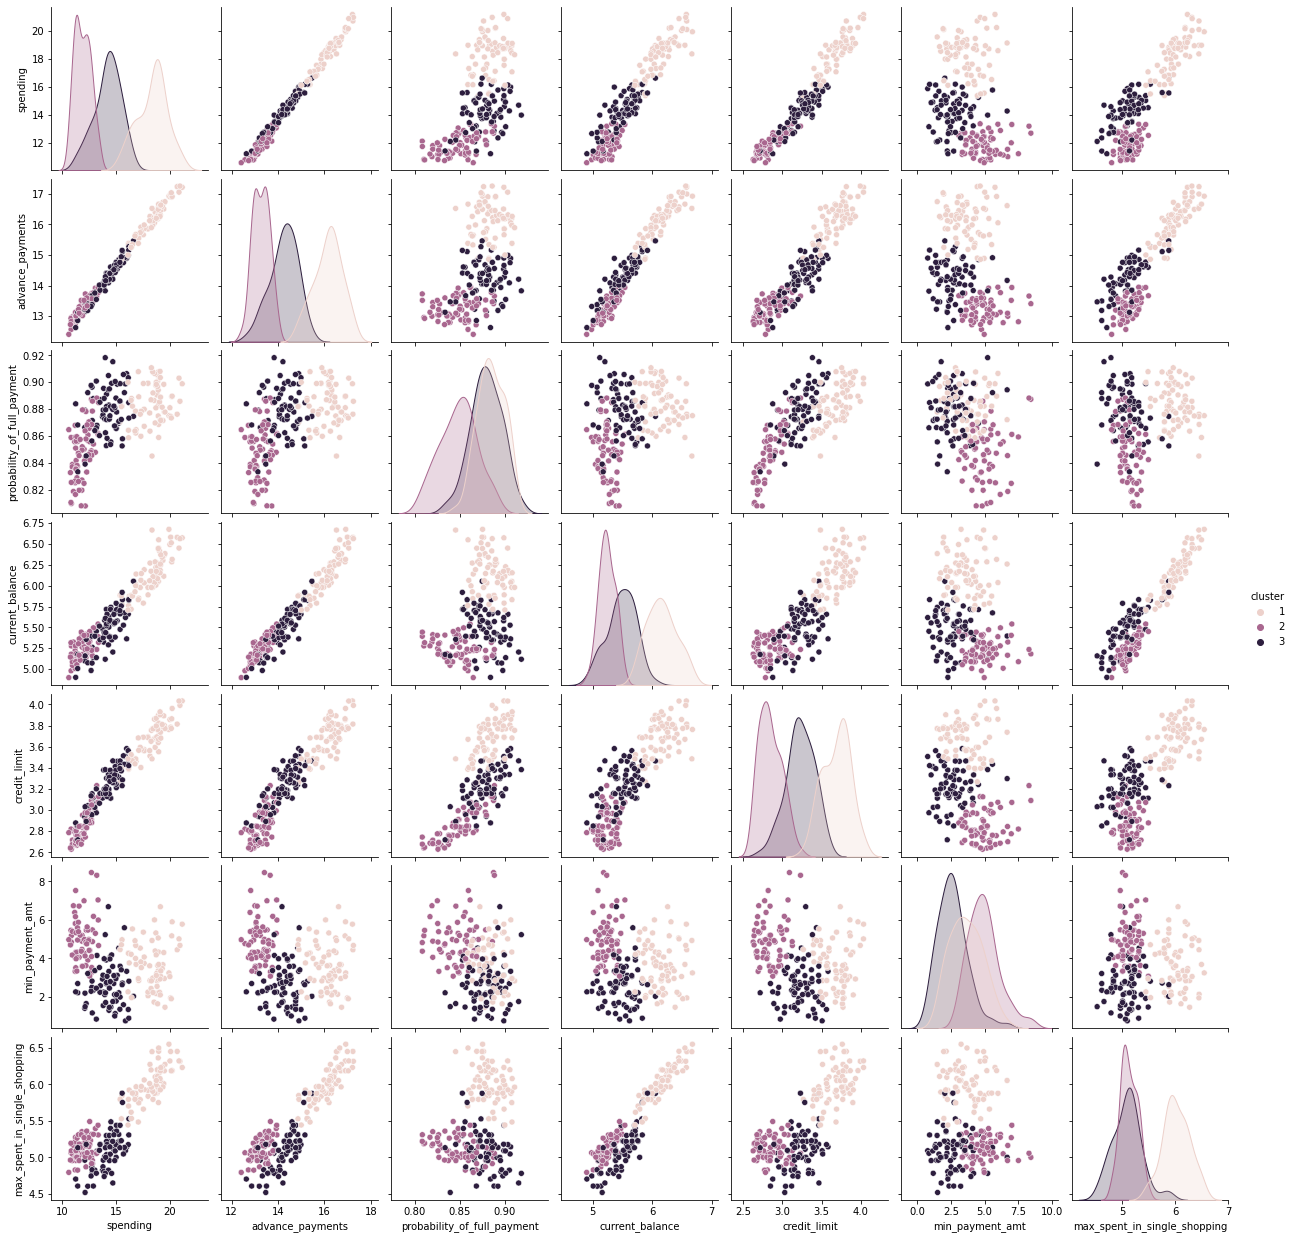

In [20]:
sns.pairplot(data=df,hue='cluster') # bivariate plots for each combination of features using 'cluster' column for hue

In [21]:
from sklearn.cluster import KMeans 

In [22]:
wss=[] #list for with in sum of squares 
for i in range(2,8): 
    km = KMeans(n_clusters=i,random_state=40)
    km.fit_transform(df_scaled)
    wss.append(km.inertia_)

In [23]:
wss #list for with in sum of squares for different number of clusters

[659.1717544870411,
 430.65897315130064,
 371.2419306631327,
 328.23807711559976,
 290.17476009521096,
 262.37365578517023]

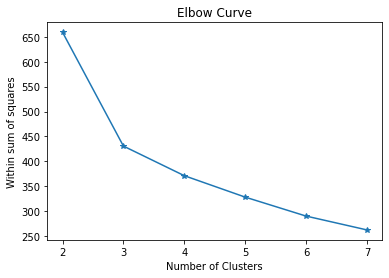

In [24]:
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Within sum of squares')
plt.plot(range(2,8),wss,marker='*') #visualizing the WSS (Elbow curve)

In [25]:
km = KMeans(n_clusters = 3,random_state=40) 
km.fit(df_scaled) # fitting the data 
labels = km.labels_ #getting the cluster labels 

In [26]:
df["Clus_kmeans"] = labels #appending the labels in dataset
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score # for silhouette score and sil. width calc.

In [28]:
silhouette_score(df_scaled,labels) 

0.40072705527512986

In [29]:
sil_width = silhouette_samples(df_scaled,labels)

In [30]:
df_scaled["sil_width"] = sil_width #appending sil_width column in dataset
df_scaled.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,0.573699
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,0.366386
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,0.637784
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,0.512458
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,0.362276


In [31]:
sil_width.min() #min sil_width

0.002713089347678376

<AxesSubplot:title={'center':'Sil width'}>

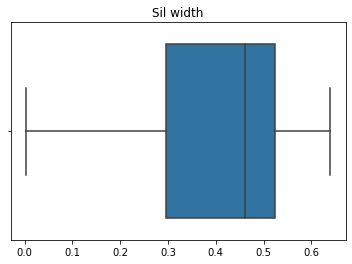

In [32]:
plt.title('Sil width')
sns.boxplot(sil_width) #distribution of sil_width

In [33]:
from sklearn.decomposition import PCA 

In [34]:
pc_2 = PCA(n_components=2) #Creating a PCA object 

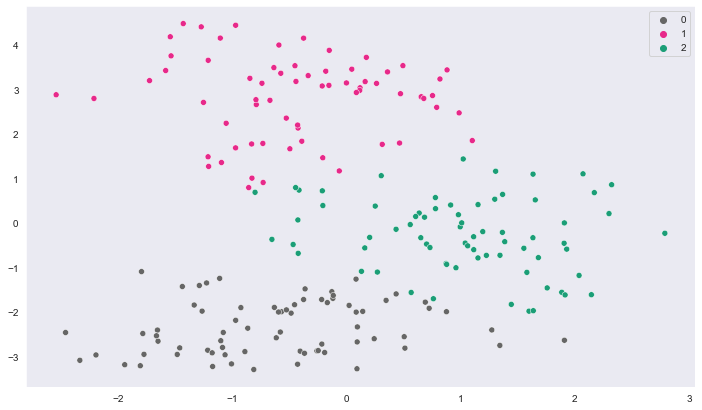

In [35]:
plot_columns = pc_2.fit_transform(df_scaled) # Visualization of formed clusters 
plt.figure(figsize=(12,7)) 
sns.set_style("dark")
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0], hue=KMeans(n_clusters=3, random_state=40).fit(df_scaled).labels_,palette='Dark2_r')
sns.set_style('white')

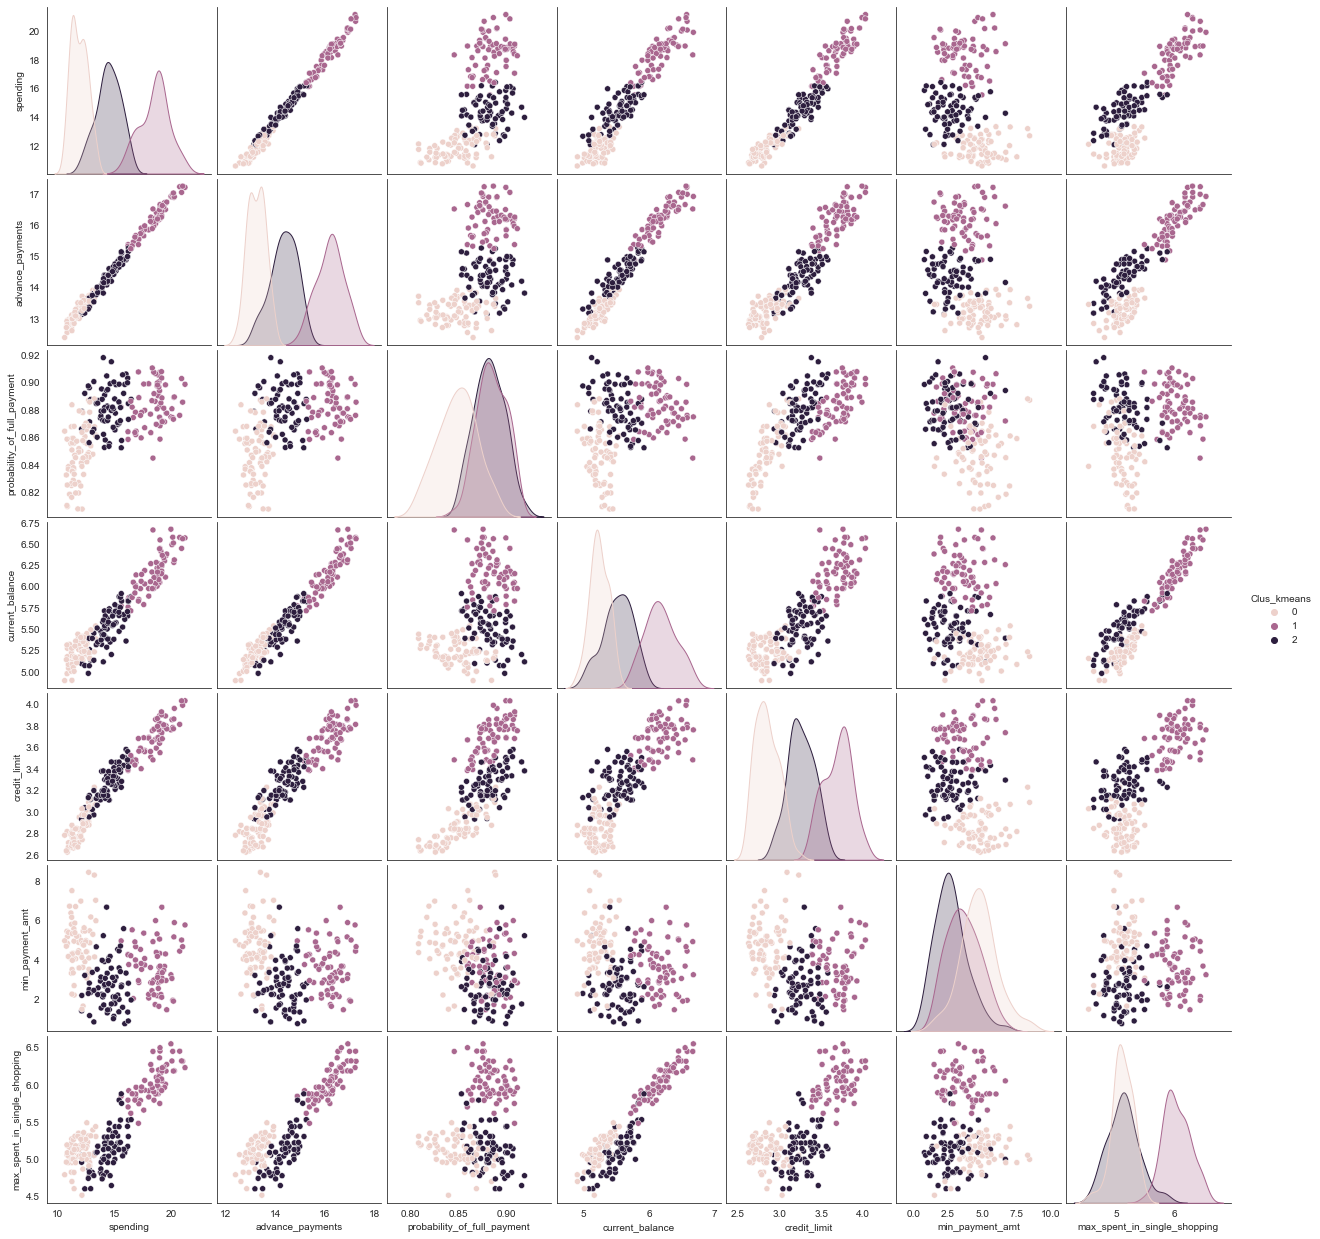

In [36]:
sns.pairplot(df.drop('cluster',axis=1),hue='Clus_kmeans') #visualization of formed clusters (K-Means)

***

# Problem 2: CART, RF and ANN

## Insurance Dataset

In [37]:
idata = pd.read_csv('insurance_part2_data.csv') #importing the data set

In [38]:
idata.head() #top 5 rows of dataset

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [39]:
idata.info() #information of attributes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [40]:
idata.describe() # description of dataset

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [41]:
idata.isnull().sum() #null value counts

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [42]:
for feature in idata.columns: # checking the value count of each level in the object type attributes
    if idata[feature].dtype==('O'):
        print(idata[feature].value_counts(),'\n')

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64 

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64 

No     2076
Yes     924
Name: Claimed, dtype: int64 

Online     2954
Offline      46
Name: Channel, dtype: int64 

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64 

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64 



Distplot for variable: Age
****************************************************************************************************


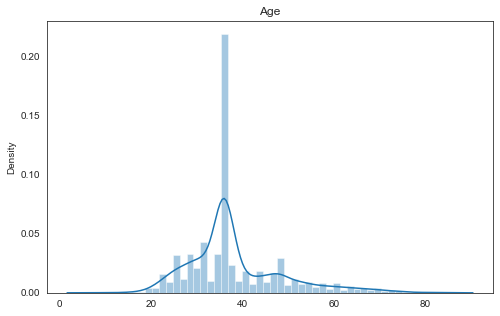

****************************************************************************************************
Boxplot for variable: Age


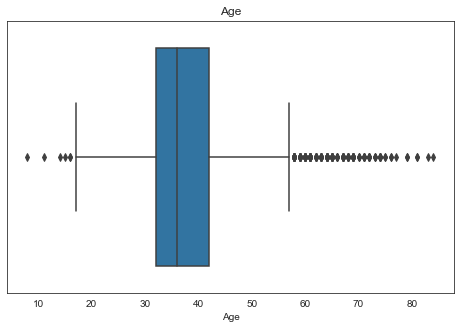

---------------------------------------------------------------------------------------------------- 
 

Countplot for variable: Agency_Code


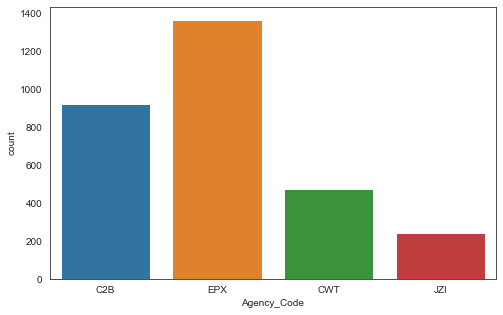

----------------------------------------------------------------------------------------------------
 

Countplot for variable: Type


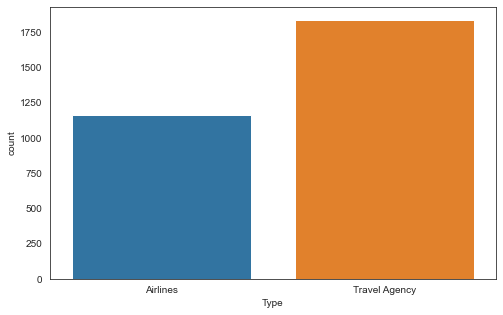

----------------------------------------------------------------------------------------------------
 

Countplot for variable: Claimed


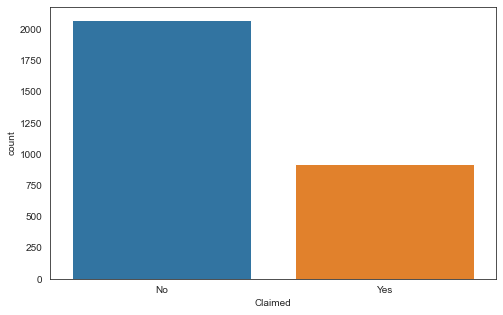

----------------------------------------------------------------------------------------------------
 

Distplot for variable: Commision
****************************************************************************************************


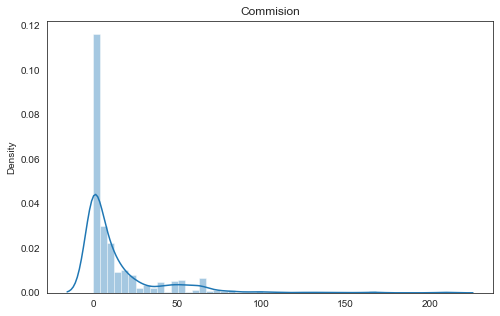

****************************************************************************************************
Boxplot for variable: Commision


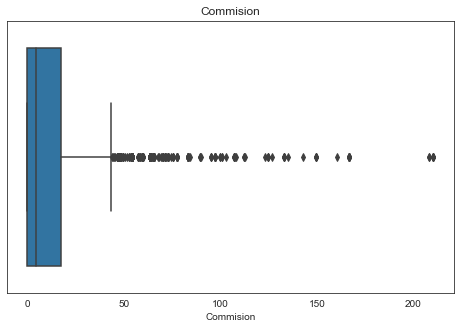

---------------------------------------------------------------------------------------------------- 
 

Countplot for variable: Channel


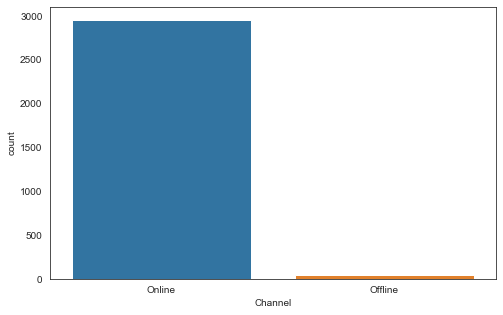

----------------------------------------------------------------------------------------------------
 

Distplot for variable: Duration
****************************************************************************************************


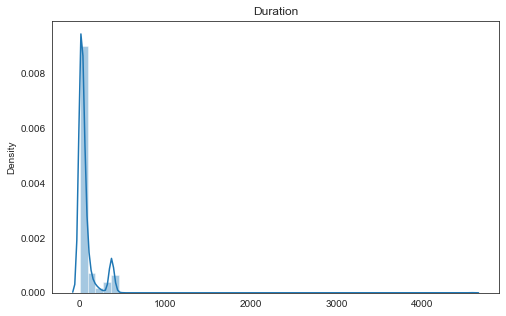

****************************************************************************************************
Boxplot for variable: Duration


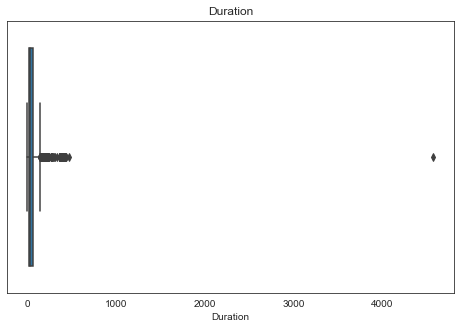

---------------------------------------------------------------------------------------------------- 
 

Distplot for variable: Sales
****************************************************************************************************


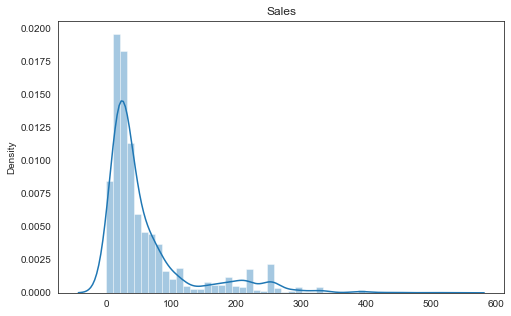

****************************************************************************************************
Boxplot for variable: Sales


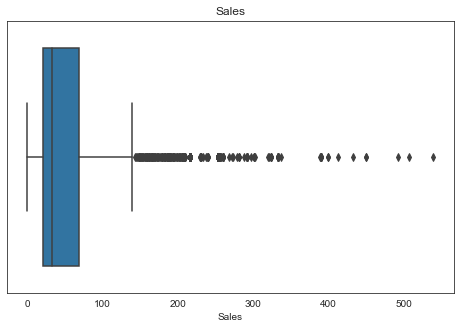

---------------------------------------------------------------------------------------------------- 
 

Countplot for variable: Product Name


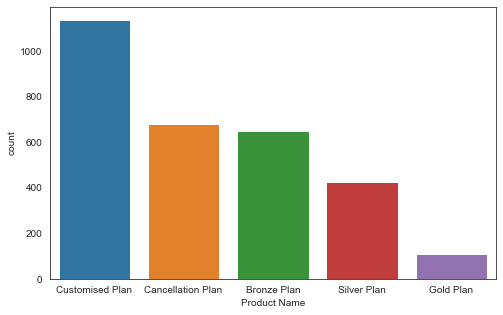

----------------------------------------------------------------------------------------------------
 

Countplot for variable: Destination


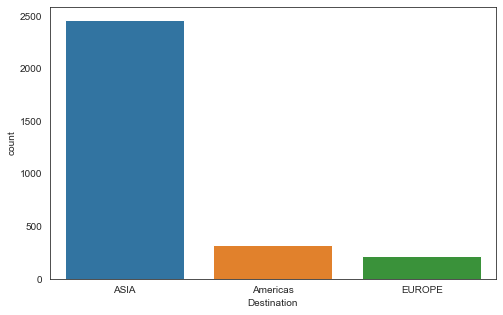

----------------------------------------------------------------------------------------------------
 



In [43]:
# Univariate Analysis
plt.rcParams["figure.figsize"] = (8,5)
for i in idata.columns:
    if type(idata[i][0])==str:
        print('Countplot for variable:',i)
        sns.countplot(idata[i])
        plt.show()
        print('-'*100+'\n \n')
    else:
        print('Distplot for variable:',i)
        print('*'*100)
        plt.title(i)
        sns.distplot(x=idata[i])
        plt.show()
        print('*'*100)
        print('Boxplot for variable:',i)
        plt.title(i)
        sns.boxplot(x=i,data=idata)
        plt.show()
        print('-'*100+' \n \n')

In [44]:
idata[idata['Duration']>4000] # extreme outlier for duration attribute

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA


<AxesSubplot:xlabel='Duration'>

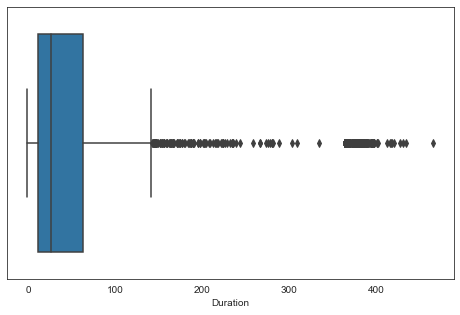

In [45]:
sns.boxplot(idata[idata['Duration']<4000]['Duration']) # distribution of Duration attribute without the extreme outlier

In [46]:
for feature in idata.columns:  # converting the object type variable in integer type using pandas for further analysis
    if idata[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(idata[feature].unique()))
        print(pd.Categorical(idata[feature].unique()).codes)
        idata[feature] = pd.Categorical(idata[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [47]:
idata.info() #checking if the earlier code worked properly or not (all are numeric type attributes now)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


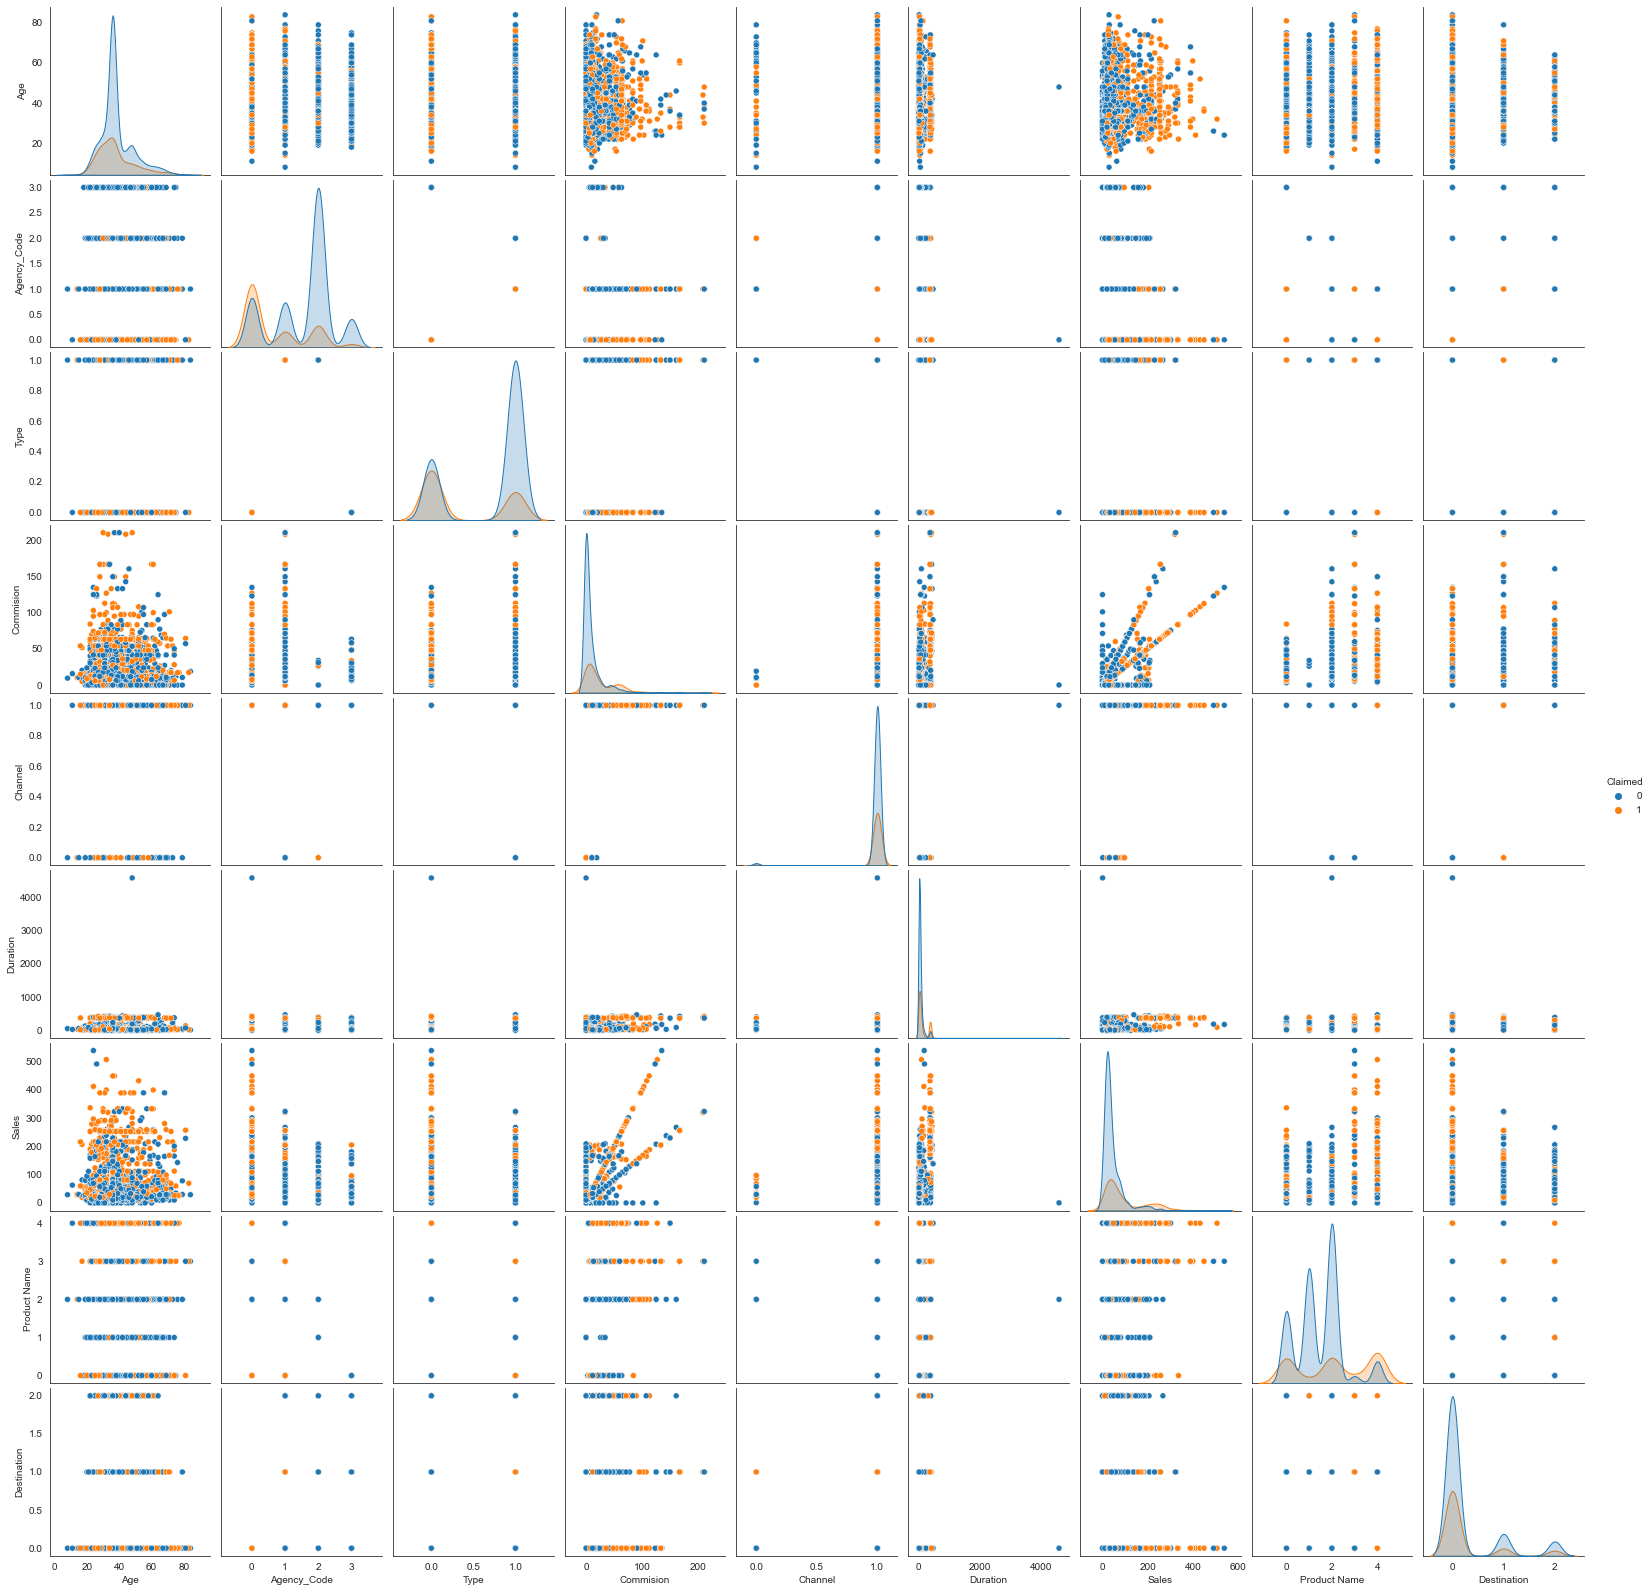

In [48]:
sns.pairplot(idata,hue='Claimed') # Bivariate visualization

In [49]:
from sklearn.model_selection import train_test_split # splitting the data in train and test test 

In [50]:
X = idata.drop('Claimed',axis=1)
y = idata.pop('Claimed')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=40)

In [52]:
y.value_counts() # Checking the value count of target attribute

0    2076
1     924
Name: Claimed, dtype: int64

In [53]:
y_test.value_counts(normalize=True) #checking for the proportions of classes in train and test set

0    0.693333
1    0.306667
Name: Claimed, dtype: float64

In [54]:
y_train.value_counts(normalize=True)

0    0.691429
1    0.308571
Name: Claimed, dtype: float64

# Decision Tree Model

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=40) #Decision tree classifier

In [57]:
dtree.fit(X_train,y_train) # fitting without any tuning (full grown decision tree model)

DecisionTreeClassifier(random_state=40)

In [58]:
pred_train = dtree.predict(X_train) #predicting on train data
pred_test = dtree.predict(X_test) #predicting on test data

In [59]:
from sklearn.metrics import classification_report,plot_confusion_matrix

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1452
           1       1.00      0.99      0.99       648

    accuracy                           1.00      2100
   macro avg       1.00      0.99      0.99      2100
weighted avg       1.00      1.00      1.00      2100

Confusion Matrix:


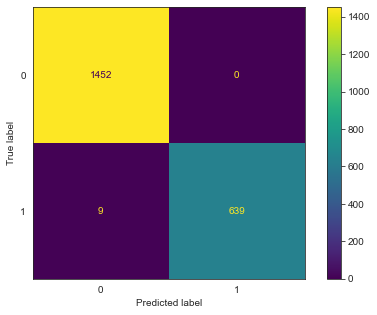

In [60]:
print('Classification report:') # printing the performance metrics for train set
print(classification_report(y_train,pred_train))
print('Confusion Matrix:')
plot_confusion_matrix(dtree,X_train,y_train); 

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       624
           1       0.52      0.51      0.52       276

    accuracy                           0.71       900
   macro avg       0.65      0.65      0.65       900
weighted avg       0.70      0.71      0.71       900

Confusion Matrix:


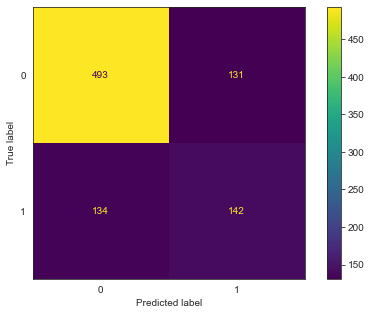

In [61]:
print('Classification report:') # printing performance metrics for test data
print(classification_report(y_test,pred_test))
print('Confusion Matrix:')
plot_confusion_matrix(dtree,X_test,y_test);

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
# Applying grid search for tuning the hyperparameters of Decision tree model 
param_grid_dtree = {
    'max_features'     :[8],#,4,6, 
    'max_depth'        :[5], #,8,10], 
    'min_samples_leaf' :[20], #,30,40,50,60], 20
    'min_samples_split':[200] #50, 80, 100]  200
}

dtree = DecisionTreeClassifier(random_state=40)

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid_dtree, cv = 10) # using 10 fold cross validation

In [64]:
grid_search.fit(X_train,y_train) # fitting on train data

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'max_depth': [5], 'max_features': [8],
                         'min_samples_leaf': [20], 'min_samples_split': [200]})

In [65]:
grid_search.best_params_ # best parameters obatined after runnning the grid search

{'max_depth': 5,
 'max_features': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 200}

In [66]:
best_dtree = grid_search.best_estimator_

In [67]:
pred_dtree_train_b = best_dtree.predict(X_train) # predicting using the best decision tree model obatined from Grid search method
pred_dtree_test_b = best_dtree.predict(X_test)

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1452
           1       0.70      0.59      0.64       648

    accuracy                           0.79      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.79      0.79      2100

Confusion Matrix:


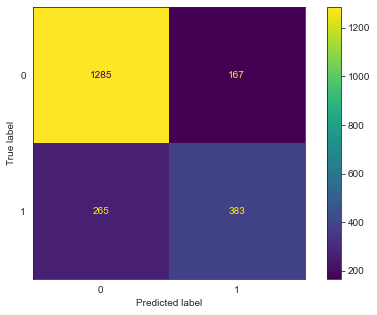

In [68]:
print('Classification report:') # printing the performance metrics for train set
print(classification_report(y_train,pred_dtree_train_b))
print('Confusion Matrix:')
plot_confusion_matrix(best_dtree,X_train,y_train);

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       624
           1       0.64      0.53      0.58       276

    accuracy                           0.76       900
   macro avg       0.72      0.70      0.71       900
weighted avg       0.76      0.76      0.76       900

Confusion Matrix:


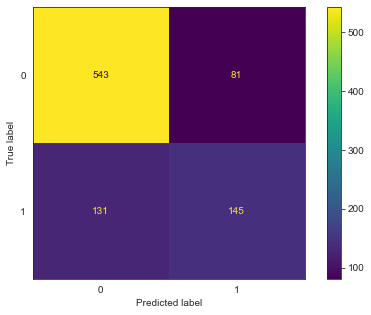

In [69]:
print('Classification report:') # printing the performance metrics for test set
print(classification_report(y_test,pred_dtree_test_b))
print('Confusion Matrix:')
plot_confusion_matrix(best_dtree,X_test,y_test);

In [70]:
# from sklearn import tree # FOR VISUALISATION OF DECISION TREE MODEL (Please install graphviz library for running this code)

# train_char_label = ['No', 'Yes']
# d_Tree_File = open('d_Tree_File.dot','w')
# dot_data = tree.export_graphviz(best_dtree, 
#                                 out_file=d_Tree_File, 
#                                 feature_names = list(X_train), 
#                                 class_names = list(train_char_label))

# d_Tree_File.close()
# !dot -Tpng d_Tree_File.dot -o d_Tree_File.png

AUC: 0.834


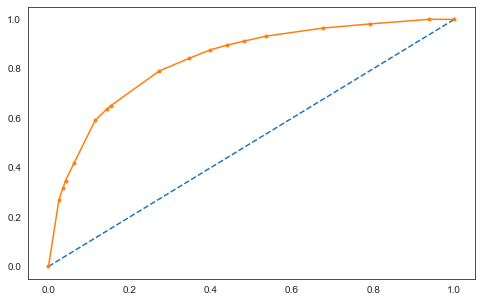

In [71]:
# ROC AND AUC SCORE Calculations (For train set):

# predict probabilities
probs = best_dtree.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.778


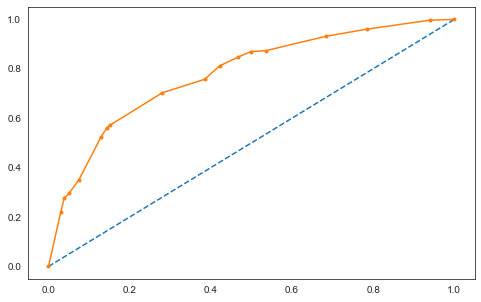

In [72]:
# ROC AND AUC SCORE Calculations (For test set):

# predict probabilities
proba = best_dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
proba = proba[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, proba)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, proba)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# RANDOM FOREST MODEL

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
# Applying grid search for tuning the hyperparameters of Random Forest model 

param_grid_rfcl = {
     'max_features'    :[4],#,6,8],
     'max_depth'       :[5],#,7,10],
    'min_samples_leaf' :[300], #100],
    'min_samples_split':[10], #,30,100],
    'n_estimators'     :[200]#,100,300]
}

rfcl = RandomForestClassifier(random_state=40)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 10, n_jobs = -1) # 10 fold cross validation 

In [75]:
grid_search.fit(X_train,y_train) #fitting on Train data

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=40),
             n_jobs=-1,
             param_grid={'max_depth': [5], 'max_features': [4],
                         'min_samples_leaf': [300], 'min_samples_split': [10],
                         'n_estimators': [200]})

In [76]:
grid_search.best_params_ # best parameters obatined from grid search

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 300,
 'min_samples_split': 10,
 'n_estimators': 200}

In [77]:
best_rfcl = grid_search.best_estimator_ 

In [78]:
pred_train_rfcl_b = best_rfcl.predict(X_train) #predicting for train set
pred_test_rfcl_b = best_rfcl.predict(X_test) # predicting for test set

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1452
           1       0.64      0.62      0.63       648

    accuracy                           0.77      2100
   macro avg       0.73      0.73      0.73      2100
weighted avg       0.77      0.77      0.77      2100

Confusion Matrix:


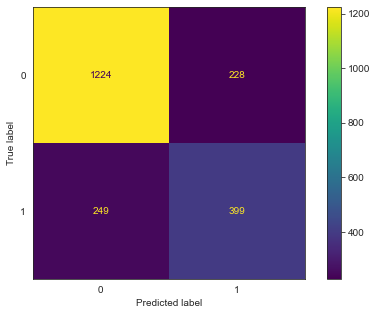

In [79]:
print('Classification Report:') # performance metrics for predictions on Train set
print(classification_report(y_train,pred_train_rfcl_b))
print('Confusion Matrix:')
plot_confusion_matrix(best_rfcl,X_train,y_train);

Classification Report: 

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       624
           1       0.63      0.55      0.59       276

    accuracy                           0.76       900
   macro avg       0.72      0.70      0.71       900
weighted avg       0.75      0.76      0.76       900

Confusion Matrix:


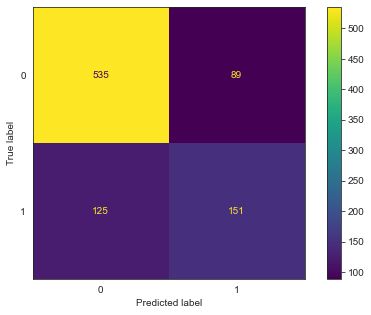

In [80]:
print('Classification Report: \n') # performance metrics for predictions on Test set
print(classification_report(y_test,pred_test_rfcl_b))
print('Confusion Matrix:')
plot_confusion_matrix(best_rfcl,X_test,y_test);

AUC: 0.803


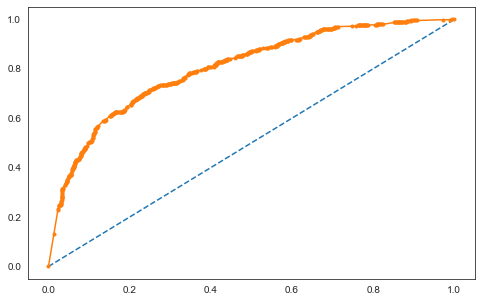

In [81]:
# ROC AND AUC SCORE Calculations (For train set):

# predict probabilities
probs = best_rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.780


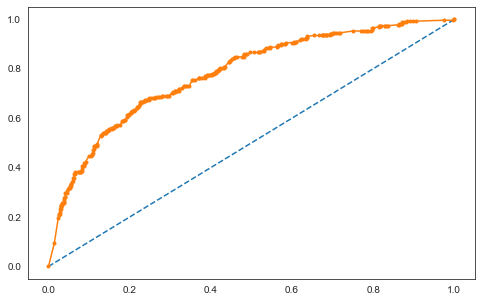

In [82]:
# ROC AND AUC SCORE Calculations (For test set):

# predict probabilities
proba = best_rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
proba = proba[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, proba)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, proba)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Neural Network Model

In [83]:
sc = StandardScaler()  # creating standard scaler object for normalizing the data

In [84]:
X_train = sc.fit_transform(X_train) #Normalizing the Train data

In [85]:
X_test = sc.transform(X_test) #normalizing the test data

In [86]:
from sklearn.neural_network import MLPClassifier

In [87]:
# Applying grid search for tuning the hyperparameters of Neural Network model 

param_grid_nncl = {
    'hidden_layer_sizes': [50],#200,100,300],
    'max_iter': [5000],#,2500,7000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.0001],
}

nncl = MLPClassifier(random_state=40)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10) #10 fold cross validation

In [88]:
grid_search.fit(X_train,y_train) # fitting on train data set

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=40),
             param_grid={'hidden_layer_sizes': [50], 'max_iter': [5000],
                         'solver': ['sgd', 'adam'], 'tol': [0.0001]})

In [89]:
grid_search.best_params_ #best parameters obatined from grid search 

{'hidden_layer_sizes': 50, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.0001}

In [90]:
best_nncl = grid_search.best_estimator_ #best neural network classifier model found by grid search

In [91]:
pred_nncl_train_b = best_nncl.predict(X_train) #predicting on train set
pred_nncl_test_b = best_nncl.predict(X_test) #predicting on test set

Classification Report: 

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1452
           1       0.70      0.55      0.61       648

    accuracy                           0.79      2100
   macro avg       0.76      0.72      0.73      2100
weighted avg       0.78      0.79      0.78      2100

Confusion Matrix:


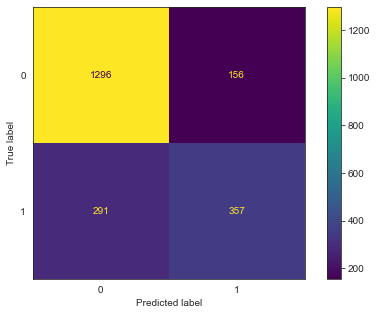

In [92]:
print('Classification Report: \n') # checking for performance metrics on train set
print(classification_report(y_train,pred_nncl_train_b))
print('Confusion Matrix:')
plot_confusion_matrix(best_nncl,X_train,y_train);

Classification Report: 

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       624
           1       0.66      0.49      0.57       276

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.70       900
weighted avg       0.76      0.77      0.76       900

Confusion Matrix:


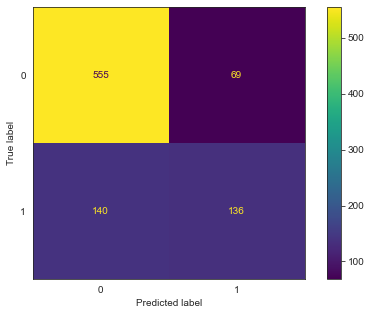

In [93]:
print('Classification Report: \n') # checking for performance metrics on test set
print(classification_report(y_test,pred_nncl_test_b))
print('Confusion Matrix:')
plot_confusion_matrix(best_nncl,X_test,y_test);

AUC: 0.844


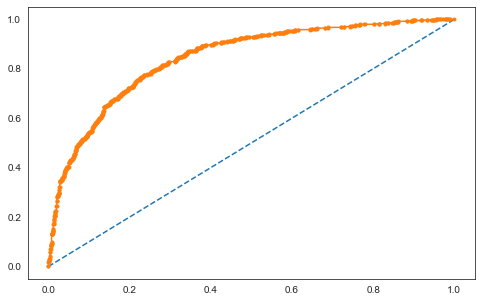

In [94]:
# ROC AND AUC SCORE Calculations (For train set):

# predict probabilities
probs = best_nncl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.803


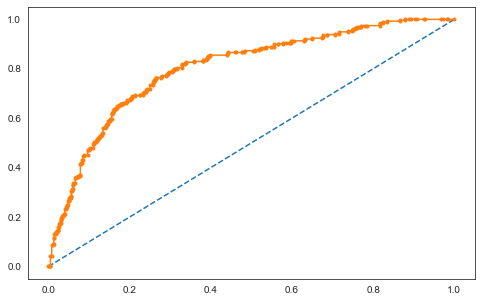

In [95]:
# ROC AND AUC SCORE Calculations (For test set):

# predict probabilities
proba = best_nncl.predict_proba(X_test)
# keep probabilities for the positive outcome only
proba = proba[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, proba)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, proba)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**NOTE-**
<br>
This notebook is complementary file.Please refer to the business report attached with this notebook for the elaboration.

***

# Thank You!